# Churn Analysis (Data Science Project)

# 1. Import relevant libraries

In [142]:
# Step 1: Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew


# sklearn modules for data preprocessing-------------------------------------

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit, KFold


#Standard libraries for data visualization---------------------

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
#Miscellaneous Utilitiy Libraries--------------------------------------


# 2. Import Dataset

In [143]:
# Step 2: Import the dataset
data = pd.read_csv('customer_churn_data.csv')

#Step 3: Read Dataset
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 3. EDA

In [144]:
# Step 4: Evaluate data shape
data.shape

(7043, 21)

In [145]:
#Check Unique Values
df_columns = data.columns.tolist()
for col in df_columns:
  print(col, "Unique Values: ", data[col].unique())

customerID Unique Values:  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender Unique Values:  ['Female' 'Male']
SeniorCitizen Unique Values:  [0 1]
Partner Unique Values:  ['Yes' 'No']
Dependents Unique Values:  ['No' 'Yes']
tenure Unique Values:  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService Unique Values:  ['No' 'Yes']
MultipleLines Unique Values:  ['No phone service' 'No' 'Yes']
InternetService Unique Values:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity Unique Values:  ['No' 'Yes' 'No internet service']
OnlineBackup Unique Values:  ['Yes' 'No' 'No internet service']
DeviceProtection Unique Values:  ['No' 'Yes' 'No internet service']
TechSupport Unique Values:  ['No' 'Yes' 'No internet service']
StreamingTV Unique Values:  ['No' 'Yes' 'No internet service']


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [147]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [148]:
#Recheck Column Datatypes and Missing Values:
null_col = [column for column in data.columns if data[column].isnull().sum()>1]
null_col

[]

In [149]:
data_null = data[data["tenure"]==0]
data_null

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [150]:
#Percentage
print(round(data_null["TotalCharges"].count()/data["TotalCharges"].count(),4)*100,"%")

0.16 %




*   Terdapat 11 Row dengan TotalCharges Kosong
*   Seluruh Missing Values memiliki Tenure 0
*  Missing values hanya 0.16% daripada total jumlah data, sehingga bisa kita drop


In [151]:
data[data["tenure"]==0].reset_index(drop=True)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
1,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
2,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
4,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
5,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
6,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
7,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
8,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
9,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [152]:
#Convert to NaN because not detected by Python (From Whitespace)
data[data["TotalCharges"] == " "] = np.nan

In [153]:
data.dropna(inplace=True)

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   float64
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   float64
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

# 4. Check Target Variables

In [155]:
#Step 5: Check Target Variable Distribution -----------------------------------------------
data["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

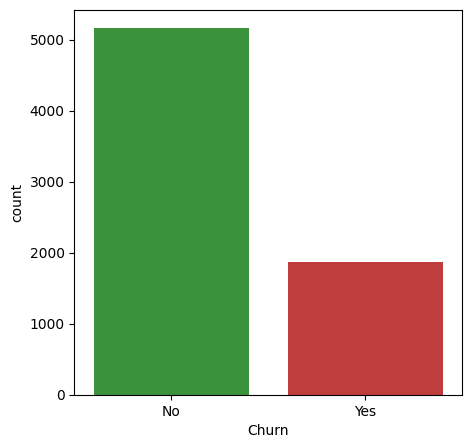

In [156]:
import seaborn as sns
plt.figure(figsize=(5,5))

palette = sns.color_palette("tab10")[2:4]
sns.countplot(x = data["Churn"], hue = data["Churn"], palette=palette)
plt.show

# 5. Analysis Predictor Columns

## 1. Customer Info Analysis

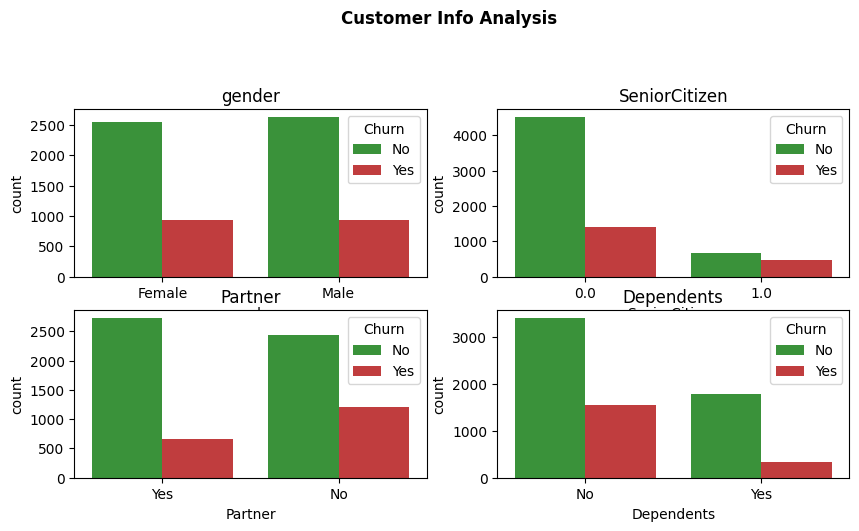

In [157]:
df_check = data[["gender", "SeniorCitizen", "Partner", "Dependents"]]
fig = plt.figure(figsize=(10,10))
plt.suptitle("Customer Info Analysis", horizontalalignment="center", fontweight="bold")
for i in range(df_check.shape[1]):
  plt.subplot(4, 2, i+1)
  f = sns.countplot(df_check, x = df_check.columns[i], hue= data["Churn"], palette = palette)
  f.set_title(df_check.columns.values[i])

plt.show()



*   Tidak ada perbedaan signifikan antara Gender untuk pelanggan yang churning
*   Pelanggan Churning secara quantity atau jumlah lebih banyak anak Muda, namun secara komposisi lebih banyak Senior Citizen
*   Customer Yang tidak memiliki partner dan anak cenderung lebih banyak churn





## 2. Service Analysis

In [158]:
# Convert NO Phone Service jadi No
data['PhoneService'] = data['PhoneService'].map({"Yes": 1, "No": 0, "No phone service": 0})

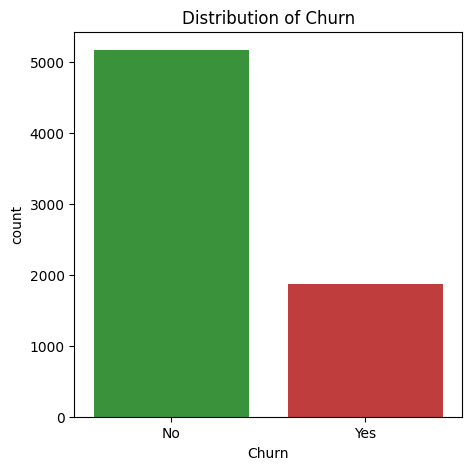

In [159]:
plt.figure(figsize=(5,5))

palette = sns.color_palette("tab10")[2:4]
sns.countplot(x=data["Churn"], hue=data["Churn"], palette=palette)
plt.title('Distribution of Churn')
plt.show()

Pelanggan tanpa layanan telepon cenderung memiliki lebih banyak churn.

## 3. Payment Analysis

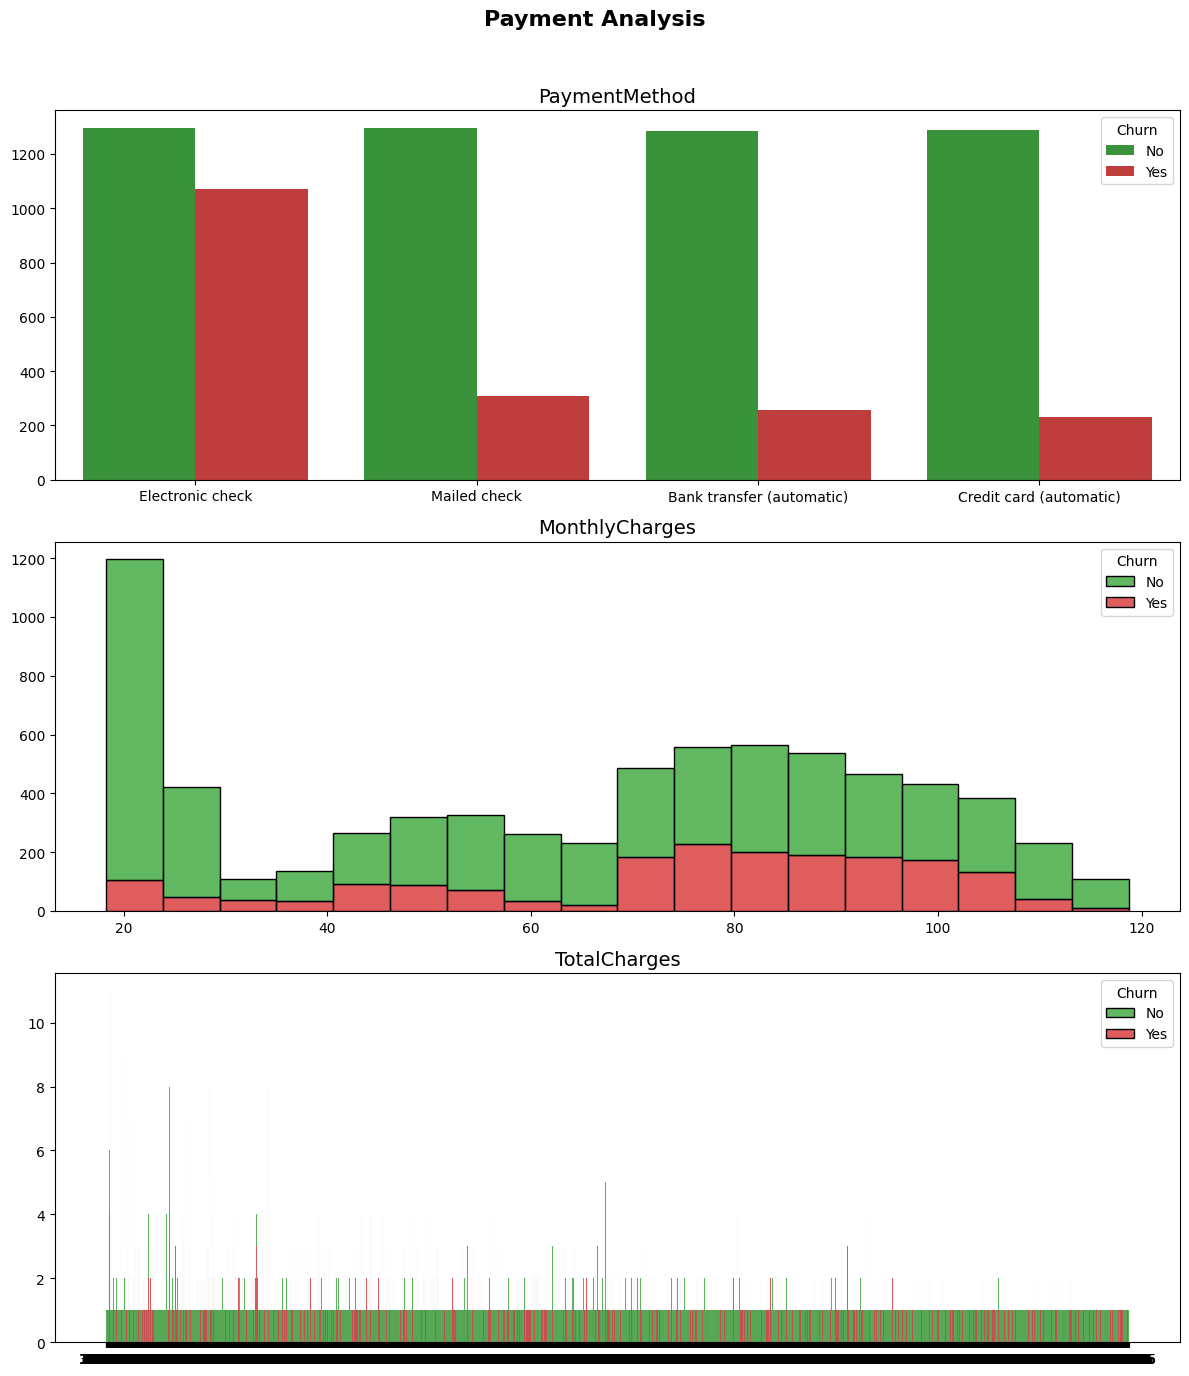

In [160]:
# Payment Analysis
payment_columns = ['PaymentMethod', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 14))
fig.suptitle("Payment Analysis", fontsize=16, fontweight="bold")

for i, ax in enumerate(axes):
    if payment_columns[i] == 'PaymentMethod':
        sns.countplot(data=data, x=payment_columns[i], hue='Churn', palette=palette, ax=ax)
    else:
        sns.histplot(data=data, x=payment_columns[i], hue='Churn', multiple='stack', palette=palette, ax=ax)
    ax.set_title(payment_columns[i], fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout(rect=[0, 0, 1, 0.96])

Pelanggan dengan metode pembayaran elektronik cenderung memiliki churn lebih tinggi.

## 4. Check Outliers

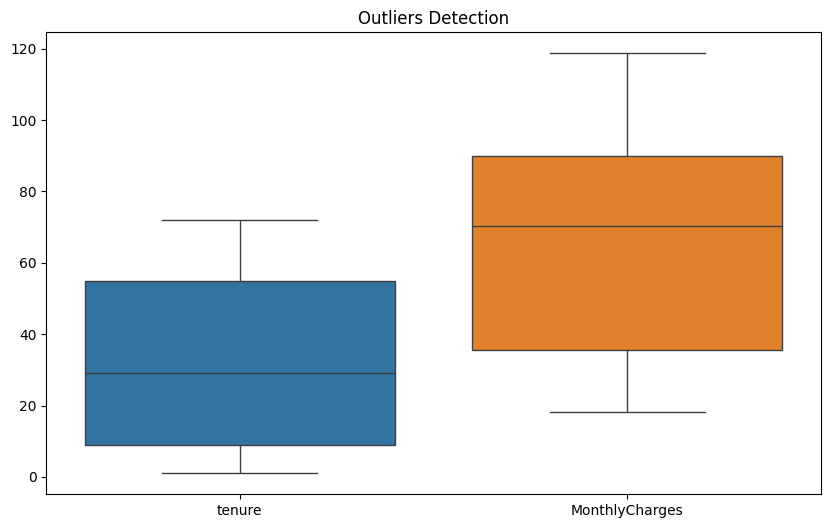

In [161]:
# Check Outliers
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=data[['tenure', 'MonthlyCharges', 'TotalCharges']], ax=ax)
plt.title('Outliers Detection')
plt.show()

# 5. Feature Engineering

## Label Encoding

In [162]:
le = []
for col in data.columns[1:]:
  if data[col].dtype == 'object':
    if len(list(data[col].unique())) <= 2:
      le.append(col)

In [163]:
le.append('MultipleLines')
le.append('PhoneService')
le.append('OnlineSecurity')
le.append('OnlineBackup')
le.append('DeviceProtection')
le.append('TechSupport')
le.append('StreamingTV')
le.append('StreamingMovies')

In [164]:
le

['gender',
 'Partner',
 'Dependents',
 'PaperlessBilling',
 'Churn',
 'MultipleLines',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [165]:
le.remove('gender')

In [166]:
def label_encoding(df, features):
  for i in features:
    df[i] = df[i].map({"Yes": 1, "No":0, "No internet service": 0, "No phone service": 0})
  return df

df = label_encoding(data,le)
df["gender"] = data["gender"].map({"Female": 0, "Male": 1})

#Note: No phone service dan no internet service convert ke No semua

In [185]:
# Convert PhoneService and InternetService
df["PhoneService"] = data["PhoneService"].replace({"Yes": 1, "No": 0})
df["InternetService"] = data["InternetService"].replace({"DSL": 1, "Fiber optic": 2, "No": 0})

In [186]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0.0,1,0,1.0,0.0,0,1,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0.0,0,0,34.0,0.0,0,1,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0.0,0,0,2.0,0.0,0,1,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0.0,0,0,45.0,0.0,0,1,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0.0,0,0,2.0,0.0,0,2,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


## One Hot Encoding

In [171]:
fe2 = ["InternetService", "Contract", "PaymentMethod"]
df_one_hot = pd.get_dummies(df,columns=fe2)

In [172]:
#Drop CustomerID
df_one_hot = df_one_hot.drop(columns=["customerID"])

In [173]:
df_one_hot = df_one_hot.drop(columns=["PhoneService"])

# 7. Check Correlation

<function matplotlib.pyplot.show(close=None, block=None)>

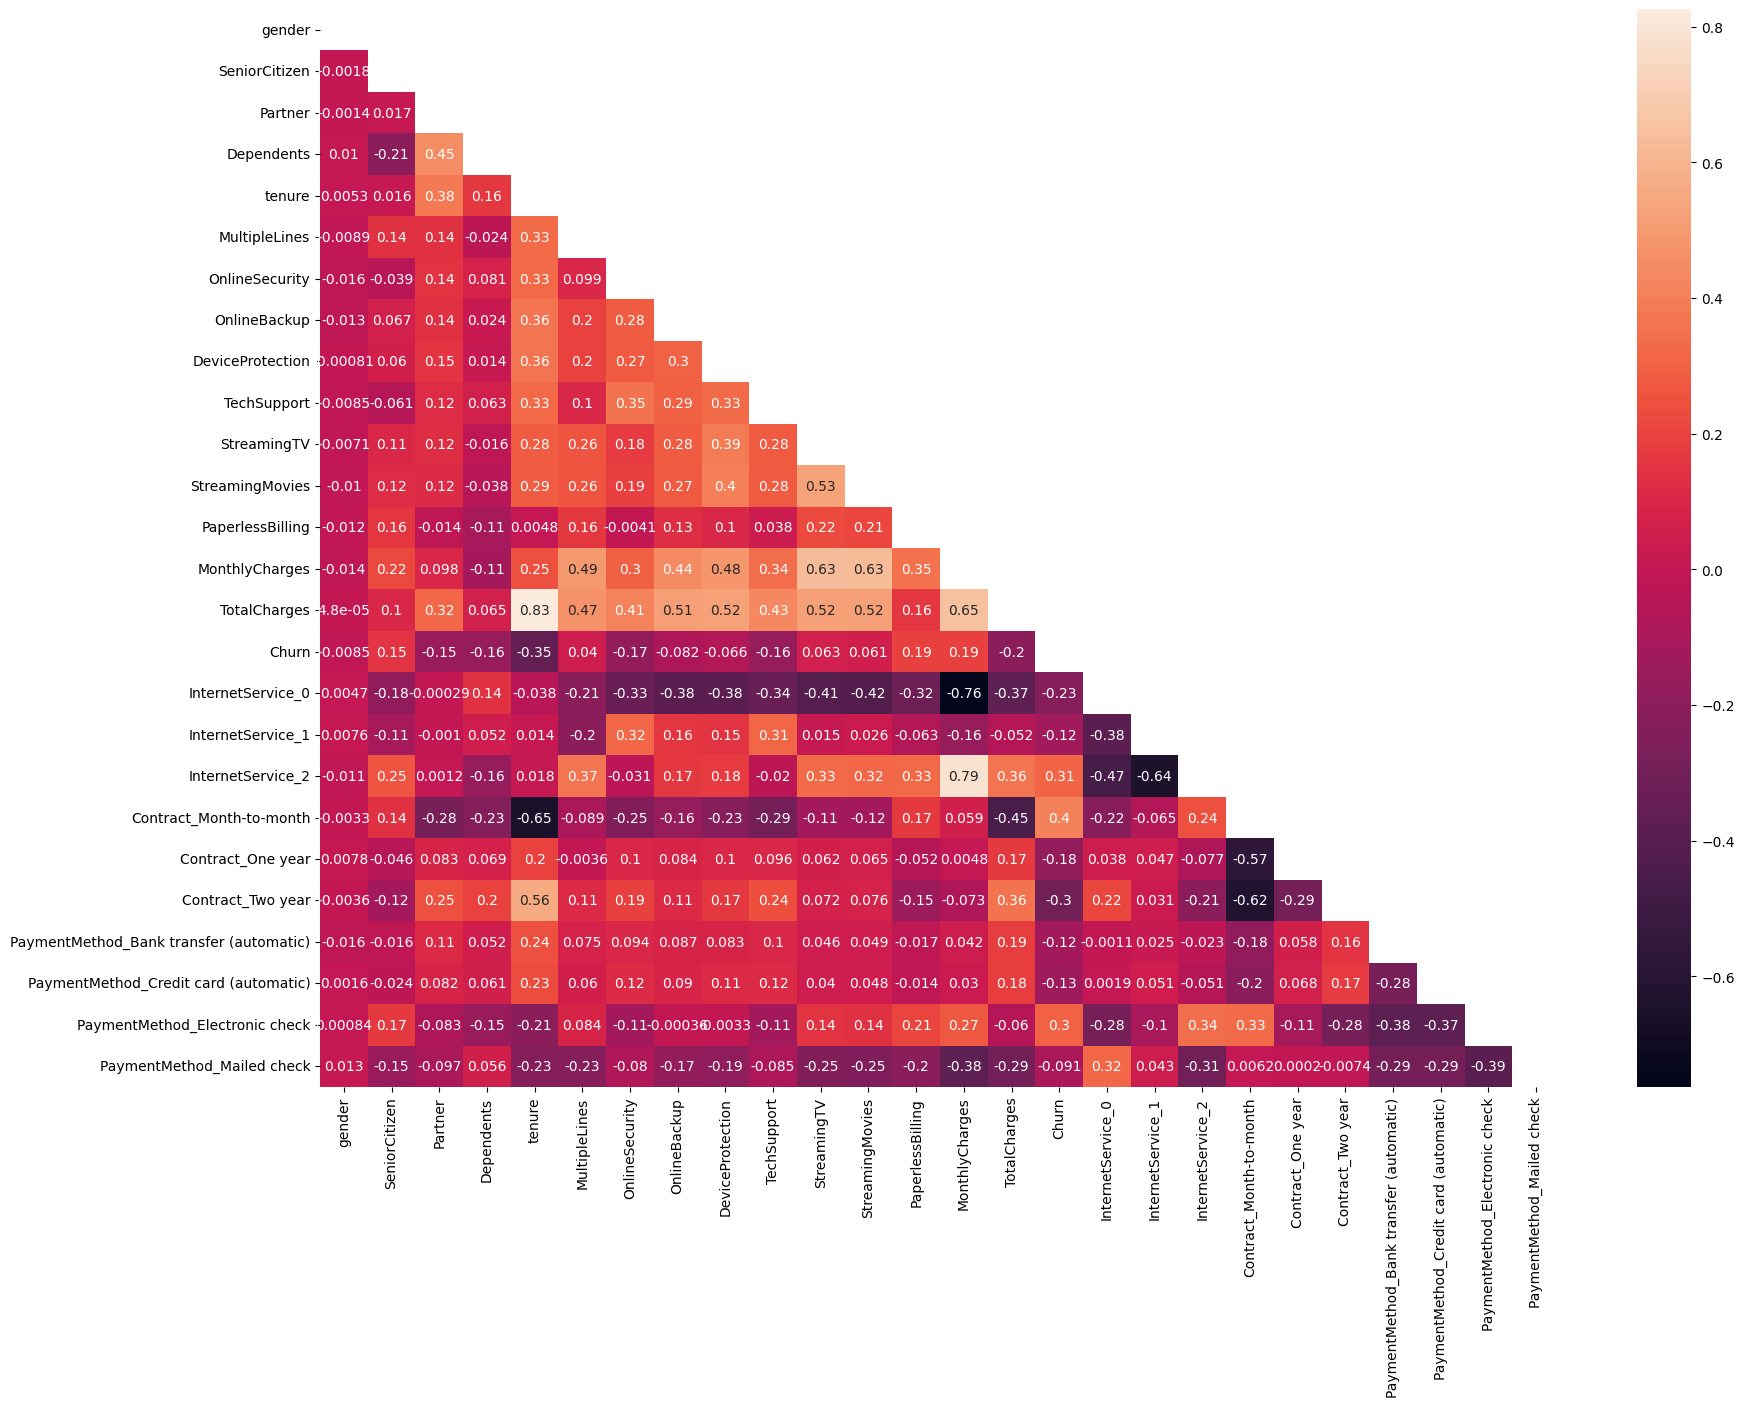

In [174]:
corr = df_one_hot.corr()
plt.figure(figsize=(20,14))

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot= True, mask=mask)
plt.show

# 8. Split dataset to X dan Y

In [175]:
X = df_one_hot.drop(columns="Churn") #X atau Prediktor
y = df_one_hot["Churn"] # Y atau target

In [176]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

# 9. Train - Test Split

In [177]:
x_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 0)

Menggunakan stratisfy karena data imbalance

# 10. Feature Scaling

In [178]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
X_test = scaler.transform(X_test)

# 11. Model Selection

In [179]:
# Model Selection
models = []
models.append(('LogisticRegression', LogisticRegression(solver="liblinear", random_state=0, class_weight="balanced")))
models.append(('RandomForest', RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(probability=True, random_state=0)))
models.append(('NaiveBayes', GaussianNB()))
models.append(('DecisionTree', DecisionTreeClassifier(random_state=0)))
models.append(('GradientBoosting', ensemble.GradientBoostingClassifier(random_state=0)))
models.append(('AdaBoost', ensemble.AdaBoostClassifier(random_state=0)))
models.append(('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)))

# Evaluation
acc_results = []
auc_results = []
names = []
col = ["Algorithm", "ROC-AUC Mean", "Accuracy Mean"]
model_results = pd.DataFrame(columns=col)

from sklearn import model_selection

i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_auc_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring="roc_auc")
    cv_acc_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring="accuracy")

    auc_results.append(cv_auc_results)
    acc_results.append(cv_acc_results)
    names.append(name)
    model_results.loc[i] = [name, round(cv_auc_results.mean()*100, 2), round(cv_acc_results.mean()*100, 2)]
    i += 1

print(model_results.sort_values(by=["ROC-AUC Mean"], ascending=False))

            Algorithm  ROC-AUC Mean  Accuracy Mean
6    GradientBoosting         84.46          79.71
0  LogisticRegression         84.30          74.70
7            AdaBoost         84.30          80.12
4          NaiveBayes         83.10          74.51
1        RandomForest         82.72          79.09
8             XGBoost         82.47          78.42
3                 SVM         79.94          79.68
2                 KNN         77.55          76.21
5        DecisionTree         65.11          72.36


#Task
Do the exact same modelling process, but with preprocessing : handling imbalance data !

Perbandingkan hasil setelah melalui SMOTE dengan tidak melakukan handling data imbalance

In [180]:
#Sebelum Feature Engineering atau Split dataset menjadi X dan Y dan Train test split, lakukan SMOTE


In [181]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE before feature engineering or train-test split
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X, y)

In [182]:
# Split the SMOTE balanced data
x_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, stratify=y_smote, test_size=0.2, random_state=0)

In [183]:
# Feature Scaling for SMOTE data
x_train_smote = scaler.fit_transform(x_train_smote)
X_test_smote = scaler.transform(X_test_smote)

In [184]:
# Model Evaluation with SMOTE Data
model_results_smote = pd.DataFrame(columns=col)

i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_auc_results = model_selection.cross_val_score(model, x_train_smote, y_train_smote, cv=kfold, scoring="roc_auc")
    cv_acc_results = model_selection.cross_val_score(model, x_train_smote, y_train_smote, cv=kfold, scoring="accuracy")

    auc_results.append(cv_auc_results)
    acc_results.append(cv_acc_results)
    names.append(name)
    model_results_smote.loc[i] = [name, round(cv_auc_results.mean()*100, 2), round(cv_acc_results.mean()*100, 2)]
    i += 1

print(model_results_smote.sort_values(by=["ROC-AUC Mean"], ascending=False))

            Algorithm  ROC-AUC Mean  Accuracy Mean
6    GradientBoosting         93.17          85.02
8             XGBoost         93.07          85.12
1        RandomForest         92.93          84.77
7            AdaBoost         92.65          84.09
0  LogisticRegression         92.54          84.00
3                 SVM         91.90          83.74
2                 KNN         88.56          81.76
4          NaiveBayes         86.59          78.89
5        DecisionTree         79.84          79.76


Semua model menunjukkan peningkatan signifikan dalam AUC dan akurasi setelah menggunakan SMOTE. Ini menunjukkan bahwa penyeimbangan data membantu model dalam mengidentifikasi churn dengan lebih akurat. Model GradientBoosting, XGBoost, dan RandomForest menunjukkan performa top tiga terbaik setelah penyeimbangan data, dengan AUC dan akurasi yang sangat tinggi.